<a href="https://www.kaggle.com/code/carlamendescms/analise-de-segmentacao-de-clientes-no-e-commerce?scriptVersionId=101181996" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <font color="#ff009e">Projeto 3 - Análise de Segmentação de Clientes no e-commerce</font>
<hr color="#F5F5F5" size="1">

<img align="right" width="240" height="240" src="https://v.fastcdn.co/u/cf943cfe/59276032-0-Ilustraciones.png">

Este notebook faz parte da solução que desenvolvi para o Projeto 3 da **[Certificação Analista de Dados](https://www.laboratoria.la/br/certificacao-analise-de-dados)** da Laboratoria em parceria com a IBM.

**Por: [Carla Mendes](https://www.linkedin.com/in/carlamendescms/)**




## <img align="left"  width="240" height="120" src="https://v.fastcdn.co/u/cf943cfe/27418802-0-Laboratoria-Logo-RGB.png"> 

<hr color="#F5F5F5" size="2"> 


A **[Laboratoria](https://laboratoria.la/br)** tem como principal objetivo tornar a economia digital mais diversificada, inclusiva e competitiva que abra oportunidades para que mulheres possam desenvolver o seu potencial e assim transforme o futuro da América Latina.

<div style="display:inline-block;vertical-align:top;">
<h2>Sumário:</h2>
<ul>
    <li><a href="#contexto-projeto">Sobre o Contexto do Projeto </a></li>
    <li><a href="#descricao-variaveis">Descrição das Variáveis do Dataset</a></li>
     <li><a href="#importar-dataset">Importar o Dataset</a></li>
    <li><a href="#limpar-dataset">Entender e limpar o conjunto de dados</a></li>
     <li><a href="#analise-metricas">Análise de Métricas de Vendas </a></li>
     <li><a href="#analise-coorte">Análise de Coorte</a></li>
    <li><a href="#segmentacao"> Segmentação de Clientes usando RFM </a></li>
     <li><a href="#recomendacoes">Recomendações a UK Merch</a></li>
     <li><a href="#referencias">Referências</a></li>
</ul>
</div>

<a id='contexto-projeto'></a>
# <font color="#ff009e">Sobre o Contexto do Projeto</font>
<hr color="#F5F5F5" size="1">

### Realizar uma segmentação de clientes aplicando a metodologia RFM para um e-commerce.

Neste projeto, deverá ser realizada uma análise descritiva que mostrará ao CEO da <strong>UK Merch</strong>, uma empresa de varejo o quão bem ou mal as vendas estão indo em sua empresa.

Trata-se de uma empresa jovem, com apenas 10 meses, que se dedica à venda de vestuário no atacado, ou seja, vende em quantidades relativamente grandes (geralmente 20 peças ou mais) e oferece um preço mais competitivo que o varejo convencional. Seus clientes são empresas menores que abastecem seu estoque comprando da UK Merch.

Deverá medir o engajamento do cliente com base em uma <mark><b>análise de coorte</b></mark> e realizar uma <mark><b>segmentação de clientes aplicando a metodologia RFM</b></mark>, para que o negócio possa focar seus esforços e adotar estratégias diferenciadas para cada segmento, além de realizar a limpeza e o tratamento dos dados anteriormente a isso.

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">📌 Os principais objetivos na aprendizagem deste projeto: </div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ Realizar limpeza e tratamento de dados; </div>
<div style="color: rgb(0, 0, 0);">→ Realizar uma análise de coorte;</div>
<div style="color: rgb(0, 0, 0);">→ Realizar segmentação de clientes usando o modelo RFM; e</div>
<div style="color: rgb(0, 0, 0);">→ Desenvolver visualizações.</div>
</div>

<a id='descricao-variaveis'></a>
# <font color="#ff009e"> Descrição das Variáveis do Dataset</font>
<hr color="#F5F5F5" size="1">

| Variável | Descrição |
| --- | --- |
| **Nº da fatura** | Um número atribuído exclusivamente a cada transação. Se começar com "c", indica uma substituição. |
| **Data da fatura** | Data e hora da fatura, dia e hora em que a transação foi gerada. |
| **ID Cliente** | Número de clientes. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente. |
| **País** | O nome do país onde cada cliente reside. |
| **Quantidade** | As quantidades de cada produto (item) por transação. |
| **Valor** | Valor da fatura em libras esterlinas. |

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import squarify
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

diretorio = ''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        diretorio = diretorio + (os.path.join(dirname, filename)) # diretorio do local do dataset

In [5]:
# Verificando as versões das bibliotecas utilizadas
print('Versão do Pandas -> %s' % pd.__version__)
print('Versão do Numpy -> %s' % np.__version__)
print('Versão do Seaborn -> %s' % sns.__version__)

Versão do Pandas -> 1.3.4
Versão do Numpy -> 1.20.3
Versão do Seaborn -> 0.11.2


<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Comentário:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ A etapa de entendimento, limpeza e tratamento dos dados é um <strong>item obrigatório</strong> e sua entrega será avaliada, sendo assim, os passos desenvolvidos para esta finalidade foram <strong>descritos detalhadamente neste notebook</strong>.</div>
</div>

<a id='importar-dataset'></a>
# <font color="#ff009e"> 1. Importar o dataset </font>
<hr color="#F5F5F5" size="1">

In [6]:
df_ecommerce = pd.read_csv(diretorio)
df_ecommerce.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [7]:
df_ecommerce.columns

Index(['N° da fatura', 'Data da fatura', 'ID Cliente', 'País', 'Quantidade',
       'Valor'],
      dtype='object')

Confirmando as colunas importadas no dataset que já sabemos que deveriam ser 6 e quais são. Aqui estão todas as colunas: 'N° da fatura', 'Data da fatura', 'ID Cliente', 'País', 'Quantidade' e 'Valor'.

In [8]:
# Adicionando _ no nome das colunas para facilitar a manipulação
df_ecommerce.columns = df_ecommerce.columns.str.replace(" ", "_")

<a id='limpar-dataset'></a>
# <font color="#ff009e"> 2 - Entender e limpar o conjunto de dados </font>
<hr color="#F5F5F5" size="1">

In [9]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N°_da_fatura    25953 non-null  object 
 1   Data_da_fatura  25953 non-null  object 
 2   ID_Cliente      22229 non-null  float64
 3   País            25953 non-null  object 
 4   Quantidade      25953 non-null  int64  
 5   Valor           25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


<a id='detectar-nulo'></a>
## <font color="#ff009e"> 2.1 Detecção de nulos ou vazios </font>
<hr color="#F5F5F5" size="1">

Existem 22229 linhas com dados sobre 'ID_Cliente' enquanto há 25953 linhas preenchidas referente as outras colunas. Ou seja, temos que <mark><strong> existem 3.724 registros que não conseguimos identificar quem é o cliente</strong></mark>.

<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">☠️  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">Na análise de coorte de clientes, utilizamos como critério para cálculo da retenção de clientes uma data de coorte. Para evitar criar cenários falsos de retenção, como não conseguimos afirmar que os clientes com ID nulo são ou não os mesmos que já contabilizados em alguma data de coorte, então iremos <strong>remover os registros que tenham 'ID_Cliente' nulos</strong> e evitar esse equívoco. </div>
</div>

In [10]:
# Removendo linhas com registro nulo na coluna 'ID_Cliente'
df_ecommerce = df_ecommerce.dropna(subset=["ID_Cliente"])

In [11]:
# verificando se existem valores nulos em qualquer uma das colunas
df_ecommerce.isnull().values.any()

False

Após isso, foi possível validar que não há mais campos nulos em nenhuma das colunas existentes.

<a id='detectar-dupliacados'></a>
## <font color="#ff009e">  2.2 Detecção e remoção de dados duplicados </font>
<hr color="#F5F5F5" size="1">

In [12]:
# Removendo os dados duplicados do dataset, se houver
df_ecommerce.drop_duplicates(inplace=True)

# apresentando quantidade de linhas e colunas
df_ecommerce.shape

(22221, 6)

Para evitar contabilizar a mesma venda duas ou mais vezes, iremos remover as vendas que foram duplicadas, deixando apeas 1 venda para cada uma. Agora temos 22221 registros, ou seja, foram identificadas e <mark><strong>removidas 8 linhas duplicadas</strong></mark>.

<a id='eliminar-negativos'></a>
##  <font color="#ff009e">  2.3 Detecção e eliminação de quantidades negativas </font>
<hr color="#F5F5F5" size="1">

Como as faturas que iniciam com a letra 'C' correspondem a devolução e desejamos analisar as vendas do negócio e não os estornos realizados, então iremos identificar e remover esses valores do nosso dataset.

In [13]:
# filtrando todas as faturas que começam com 'C'
devolucao = df_ecommerce['N°_da_fatura'].str.startswith('C')

# verificando a quantidade de linhas identificadas
df_ecommerce[devolucao].shape

(3655, 6)

Foram identificadas <mark><strong>3655 compras que tiveram devolução</strong></mark> e elas <strong>serão removidas do dataset</strong>.

In [14]:
df_ecommerce.drop(df_ecommerce[devolucao].index, inplace=True)

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✔️ Resultado:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ Como resultado da limpeza realizada temos 18566 registros após aplicar a limpeza nos dados. </div>
</div>


Mas antes, para permitir a manipulação dos dados, iremos aplicar alguns tratamentos necessários para as análises.

<a id='tratamento-dados'></a>
## <font color="#ff009e"> 2.4 Tratamento de Dados </font>
<hr color="#F5F5F5" size="1">

In [15]:
# Convertendo tipo da 'Data da Fatura' para data
df_ecommerce["Data_da_fatura"] = pd.to_datetime(df_ecommerce["Data_da_fatura"])

# alterando a separação dos valores de ',' para '.' na coluna Valor
df_ecommerce['Valor'] = df_ecommerce['Valor'].str.replace(",", ".")

# alterando o tipo da coluna 'Valor' para float
df_ecommerce['Valor'] = pd.to_numeric(df_ecommerce['Valor'])

# Obtendo Ano e Mês da data 
df_ecommerce['Ano_mes'] = df_ecommerce['Data_da_fatura'].dt.to_period('M')

# Ordenando pela Data da Fatura de maneira ascendente para facilitar nossas análises
df_ecommerce.sort_values(by=['Data_da_fatura'], inplace=True)

df_ecommerce.head(7)

,N°_da_fatura,Data_da_fatura,ID_Cliente,País,Quantidade,Valor,Ano_mes
9367,536365,2020-12-01 08:26:00,17850.0,United Kingdom,40,139.12,2020-12
18259,536366,2020-12-01 08:28:00,17850.0,United Kingdom,12,22.20,2020-12
11185,536368,2020-12-01 08:34:00,13047.0,United Kingdom,15,70.05,2020-12
6876,536367,2020-12-01 08:34:00,13047.0,United Kingdom,83,278.73,2020-12
8195,536369,2020-12-01 08:35:00,13047.0,United Kingdom,3,17.85,2020-12
505,536370,2020-12-01 08:45:00,12583.0,France,449,855.86,2020-12
12932,536371,2020-12-01 09:00:00,13748.0,United Kingdom,80,204.00,2020-12


In [16]:
df_ecommerce.dtypes

N°_da_fatura              object
Data_da_fatura    datetime64[ns]
ID_Cliente               float64
País                      object
Quantidade                 int64
Valor                    float64
Ano_mes                period[M]
dtype: object

<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Resumindo as etapas de limpeza e tratamento realizadas:</strong></div></strong> <br>
     <div style="color: rgb(0, 0, 0);">→ ✔️ Remoção de 3.724 registros que não conseguimos identificar quem é o cliente, pois ID estava nulo. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Remoção de 8 faturas duplicadas. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Remoção de 3655 faturas que tiveram devolução. </div>     
    <div style="color: rgb(0, 0, 0);">→ ✔️ Utilizaremos <strong><font color="#ff009e">18566 faturas para as nossas análises.</font></strong></div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Conversão de tipos dados de algumas colunas. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Criação de coluna Ano e Mês para facilitar análises. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Dataset pronto. Vamos começar! 💪 </div>
</div>

<a id='analise-metricas'></a>
# <font color="#ff009e">  3 - Análise de Métricas de Vendas </font>
<hr color="#F5F5F5" size="1">

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">💡 O que queremos responder:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ Quanto é a venda em média por mês? </div>
    <div style="color: rgb(0, 0, 0);">→ Quantas vendas há em cada mês? </div>
    <div style="color: rgb(0, 0, 0);">→ Qual é o mês em que mais há vendas? </div>
    <div style="color: rgb(0, 0, 0);">→ Quais são os clientes mais importantes? </div>
    <div style="color: rgb(0, 0, 0);">→ Qual porcentagem de seus clientes voltou a comprar? </div>
     <div style="color: rgb(0, 0, 0);">→ Qual é o valor médio que os clientes gastam? </div>
     <div style="color: rgb(0, 0, 0);">→ Como as informações são desagregadas de acordo com os países onde há vendas? </div>
</div>

<a id='analise-faturas'></a>
## <font color="#ff009e"> 3.1 Análise do número de faturas por país </font>
<hr color="#F5F5F5" size="1">

Agora iremos analisar a quantidade total de faturas emitidas por país e a porcentagem de faturas representada por país e encontrar o **5 maiores países compradores da UK Merch**.

In [17]:
#definindo cores que serão usadas nos gráficos
cinza = '#a4a4a4'
rosa = '#ff009e'

In [18]:
# Quantidade de Fatura por país
df_fatura_pais = pd.DataFrame(df_ecommerce.groupby(['País'])
                              ['N°_da_fatura'].count()).reset_index()
df_fatura_pais.columns = ['País', 'N°_de_faturas']
df_fatura_pais.sort_values('N°_de_faturas', ascending=False, inplace=True)
df_fatura_pais.head(5)

,País,N°_de_faturas
35,United Kingdom,16676
14,Germany,457
13,France,390
10,EIRE,261
3,Belgium,98


In [19]:
#calculando percentual de faturas por país
df_fatura_pais['Percentual_de_faturas_%'] = (df_fatura_pais['N°_de_faturas']/
                                             df_fatura_pais['N°_de_faturas'].sum()) * 100
df_fatura_pais['Percentual_de_faturas_%'] = df_fatura_pais['Percentual_de_faturas_%'].round(2)
df_fatura_pais.head(5)

,País,N°_de_faturas,Percentual_de_faturas_%
35,United Kingdom,16676,89.82
14,Germany,457,2.46
13,France,390,2.10
10,EIRE,261,1.41
3,Belgium,98,0.53


O **Reino Unido** é o campeão em compras na UK Merch e **representa quase 90% da quantidade de vendas totais**. Como a empresa nasceu lá, é bem provável que isso explique o por quê dele estar em primeiro lugar. 

Os próximos 4 países com maior quantidade de compras ficam na <strong>todos ficam na Europa, ou seja, relativamente próximos ao Reino Unido</strong>. Eles são:
- Alemanha, 
- França, 
- Irlanda e 
- Bélgica, respectivamente.

<a id='analise-total-pais'></a>
## <font color="#ff009e">  3.2 Análise de valor total por país </font>
<hr color="#F5F5F5" size="1"> 


Agora iremos incluir o valor médio, o valor mínimo e o valor máximo por país.

In [20]:
# calculando o valor médio, máximo e mínimo das faturas por país
df_valor_medio = pd.DataFrame(df_ecommerce.groupby(['País'])
                              ['Valor'].mean()).round(2).reset_index()
df_valor_max = pd.DataFrame(df_ecommerce.groupby(['País'])
                            ['Valor'].max()).reset_index()
df_valor_min = pd.DataFrame(df_ecommerce.groupby(['País'])
                            ['Valor'].min()).reset_index()

# criando dataframe com a união dos valores médio, máximo e mínimo encontrados
df_valor_pais = pd.merge(df_valor_medio,df_valor_min, on="País")
df_valor_pais = pd.merge(df_valor_pais,df_valor_max, on="País")
df_valor_pais.rename(columns={"Valor_x":"Valor_médio", 
                              "Valor_y":"Valor_mínimo", 
                              "Valor":"Valor_máximo"}, inplace=True)

# criando dataframe para juntar os valores médios, mínimos e máximos
df_analise_pais = pd.merge(df_fatura_pais,
                           df_valor_pais, on="País")

# ordenando pelo valor médio de modo decrescente
df_analise_pais.sort_values('Valor_médio',
                            ascending=False, inplace=True)
df_analise_pais.head(5)

,País,N°_de_faturas,Percentual_de_faturas_%,Valor_médio,Valor_mínimo,Valor_máximo
22,Singapore,7,0.04,3039.90,999.26,6068.06
5,Netherlands,95,0.51,3004.70,0.00,20277.92
7,Australia,57,0.31,2430.20,61.20,22775.93
15,Japan,20,0.11,1870.82,15.30,5735.24
33,Lebanon,1,0.01,1693.88,1693.88,1693.88


Os <strong>países com maior valor médio por fatura</strong> são:
- Cingapura, 
- Holanda, 
- Austrália, 
- Japão e 
- Líbano. 

Podemos perceber que exceto pela Holanda, todos os outros <strong>ficam na Ásia ou Oceania, ou seja, longe do Reino Unido</strong>. 

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Comentário:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → Será que o valor médio de compra mais alto para esses países seja por causa do valor do frete internacional? 🤔</div>
</div>

In [21]:
# ordendando pelo percentual de modo decrescente
df_analise_pais.sort_values('Percentual_de_faturas_%',
                            ascending=False, inplace=True)
df_analise_pais.head(5)

,País,N°_de_faturas,Percentual_de_faturas_%,Valor_médio,Valor_mínimo,Valor_máximo
0,United Kingdom,16676,89.82,438.26,0.00,168469.60
1,Germany,457,2.46,500.80,3.00,9341.26
2,France,390,2.10,535.96,4.63,8895.76
3,EIRE,261,1.41,1017.42,1.45,16774.72
4,Belgium,98,0.53,420.37,34.00,1491.59


O Reino Unido possui um **valor médio de £438,26** por fatura. Esse valor pode ser considerado baixo quando analisamos os 5 maiores valores médios. 

<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">💭  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → Um ponto importante que percebemos que existem <strong>faturas que apresentam valores £0,00</strong>. 
        <div style="color: rgb(0, 0, 0);"> → Isso seria <strong>erro de lançamento de dados?</strong>. 🤔
        <div style="color: rgb(0, 0, 0);"> → Ou seriam <strong>doações</strong> que foram realizadas? 🤔
</div>

<a id='faturas-por-mes'></a>
## <font color="#ff009e">  3.3 Faturas geradas por mês </font>
<hr color="#F5F5F5" size="1">  

Vamos visualizar qual a quantidade de faturas geradas por mês ao longo do período.

Text(0.5, 1.0, 'Total de faturas por mês')

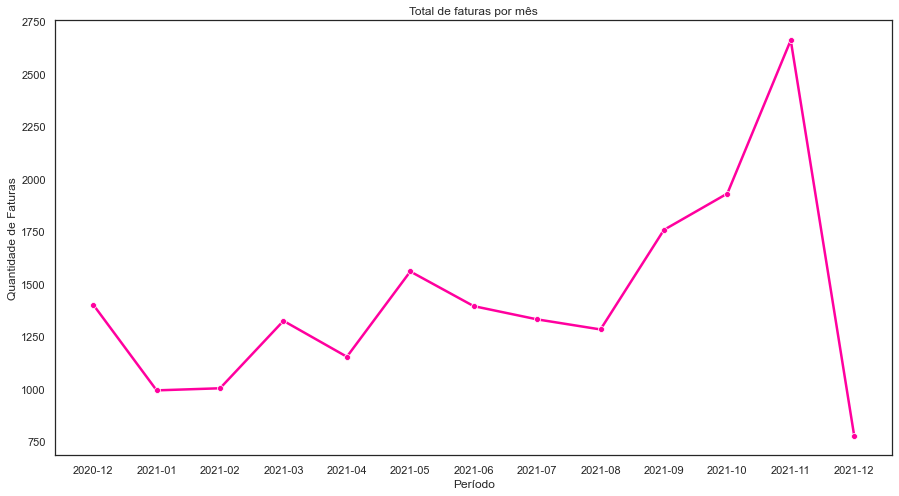

In [22]:
# agrupando a quantidade de fatura por Mês e Ano.
df_fatura_mes = pd.DataFrame(df_ecommerce.groupby(['Ano_mes'])
                             ['N°_da_fatura'].count()).reset_index()
df_fatura_mes.rename(columns={"N°_da_fatura": "Quantidade_de_faturas"},
                             inplace=True)

# convertendo tipo do dado da coluna "Ano_mes" para string
df_fatura_mes['Ano_mes'] = df_fatura_mes['Ano_mes'].astype(str)

# plotando o gráfico
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))

ax = sns.lineplot(data=df_fatura_mes,
                  x="Ano_mes",
                  y="Quantidade_de_faturas",
                  color=rosa,
                  linewidth=2.5,
                  marker="o")
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade de Faturas')
ax.set_title('Total de faturas por mês')

<a id='fatuas-por-mes'></a>
## <font color="#ff009e">  3.4 Número de faturas do Reino Unido _versus_ estrangeiras por mês </font>
<hr color="#F5F5F5" size="1">  


Após segmentar os clientes da UK Merch em dois grupos: os que <strong>pertencem ao Reino Unido</strong> e os que <strong>não pertencem ao Reino Unido</strong>, agora iremos verificar a quantidade desses dois grupos.

Primeiro iremos verificar quais são os países dos clientes.

In [23]:
df_ecommerce['País'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [24]:
# contando quantidade de faturas sem país especificado
nao_especificado = df_ecommerce[df_ecommerce['País']=='Unspecified']
nao_especificado.shape
print('Média de faturas sem país especificado: ', nao_especificado['Valor'].mean())
print('Soma de faturas sem país especificado: ', nao_especificado['Valor'].sum())

Média de faturas sem país especificado:  333.38375
Soma de faturas sem país especificado:  2667.07


Percebe-se que existem <strong>8 faturas que não possuem o país de origem definidos</strong> e não conseguidos garantir que estas faturas sejam ou não do Reino Unido. 

Porém como a soma e a média dos valores das faturas não apresentam tando impacto aos resultados finais quando comparados aos valores totais das faturas do dataset, então iremos realizar a análise contabilizando-os, deixando como <strong>não pertencentes ao Reino Unido nas somas gerais.</strong>

In [25]:
# Criando coluna para classificar se o cliente pertence ou não ao Reino Unido
df_ecommerce.loc[df_ecommerce['País']=="United Kingdom", 'Pertence_UK'] = "SIM"
df_ecommerce.loc[df_ecommerce['País']!="United Kingdom", 'Pertence_UK'] = "NÃO"

# agrupando a quantidade de faturas por ano e se pertence ou não ao Reino Unido
df_fatura_mes_pais = pd.DataFrame(df_ecommerce.groupby(['Ano_mes', 
                                              'Pertence_UK'])
                                  ['N°_da_fatura'].count()).reset_index()

# renomeando a coluna N°_da_fatura
df_fatura_mes_pais.rename(columns={"N°_da_fatura":"Quantidade_de_faturas"},inplace=True)

# convertendo tipo do dado da coluna "Ano_mes" para string 
df_fatura_mes_pais['Ano_mes'] = df_fatura_mes_pais['Ano_mes'].astype(str)

Visualizando o gráfico de **Total de Faturas por Mês** por faturas do Reino Unido X Estrangeiras

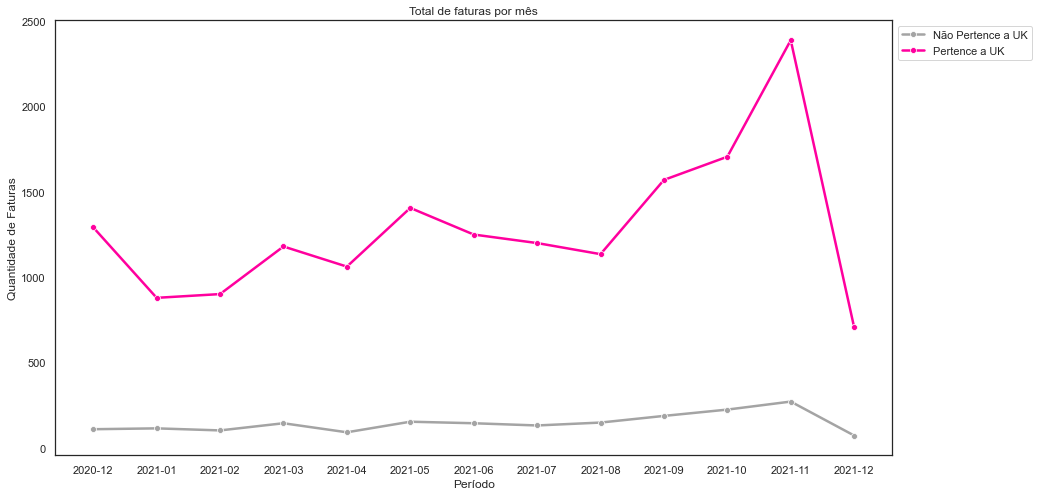

In [26]:
# plotando o gráfico
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_fatura_mes_pais,
                          x="Ano_mes",
                          y="Quantidade_de_faturas",
                          hue="Pertence_UK",
                          legend=False,
                          palette=[cinza,rosa],
                          linewidth=2.5,
                          marker="o"
                 )
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade de Faturas')
ax.set_title('Total de faturas por mês')

# alterando posição e nome dos dados da legenda
plt.legend(labels = ['Não Pertence a UK','Pertence a UK'],loc = 2, bbox_to_anchor = (1,1))

Percebe-se que, sem levar em conta o mês atípico de dezembro de 2021, ambos os segmentos estão crescendo, porém os clientes pertecentes ao Reino Unido de maneira mais acentuada. 

<a id='clientes-por-mes'></a>
## <font color="#ff009e">  3.5 Número de novos clientes por mês </font>
<hr color="#F5F5F5" size="1">  

Agora iremos analisar a quantidade de clientes únicos a cada mês

In [27]:
# Quantidade de clientes únicos por mês e ano
df_clientes_novos = pd.DataFrame(df_ecommerce.groupby(['Ano_mes'])
                                 ['ID_Cliente'].nunique()).reset_index()
df_clientes_novos.columns = ['Ano_mes', 'Quantidade_clientes_unicos']
df_clientes_novos

,Ano_mes,Quantidade_clientes_unicos
0,2020-12,885
1,2021-01,741
2,2021-02,758
3,2021-03,974
4,2021-04,856
5,2021-05,1056
6,2021-06,991
7,2021-07,949
8,2021-08,935
9,2021-09,1266


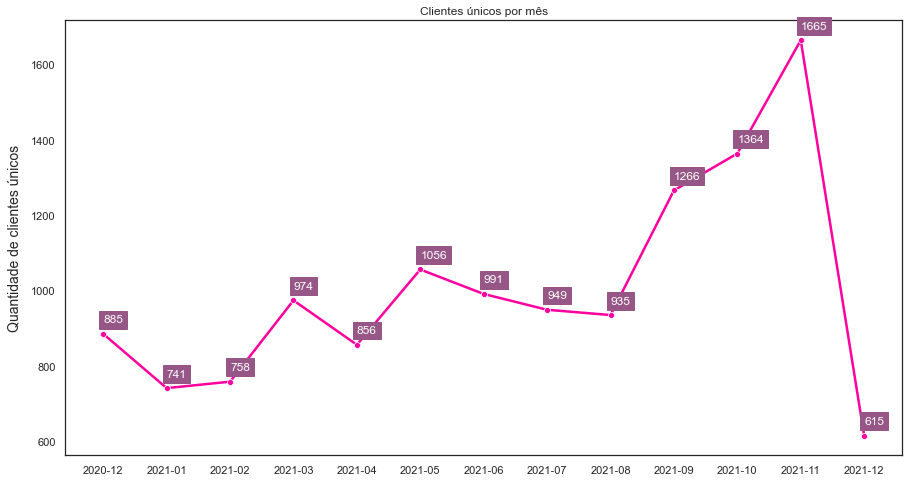

In [28]:
# convertendo tipo do dado da coluna "Ano_mes" para string 
df_clientes_novos['Ano_mes'] = df_clientes_novos['Ano_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))

ax = sns.lineplot(data=df_clientes_novos,
                  x="Ano_mes",
                  y="Quantidade_clientes_unicos",
                  color=rosa,
                  linewidth=2.5,
                  marker="o")

ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Quantidade de clientes únicos', fontsize=14, labelpad=10)
ax.set_title('Clientes únicos por mês')

# incluindo rótulos nos pontos do gráfico
for x, y in zip(df_clientes_novos['Ano_mes'], 
                df_clientes_novos['Quantidade_clientes_unicos']):
     plt.text(x = x, # posição x
               y = y+30, # posição y + 30 na coordenada
               s = '{:.0f}'.format(y), # formato 
               color = 'white').set_backgroundcolor('#965786') # cor da fonte e do background

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Comentário:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">  → O mês de Novembro/2021 teve o maior pico de clientes únicos realizando compras. Isso provavelmente se deu por causa de eventos que estimulam as compras como <strong>Black Friday</strong>? 🤔 </div>
</div>

<a id='outras-analises'></a>
## <font color="#ff009e"> 3.6 Outras análises relevantes para o dataset </font>
<hr color="#F5F5F5" size="1"> 

- Montante total de vendas por mês

Text(0, 0.5, 'Valor em Libras (k)')

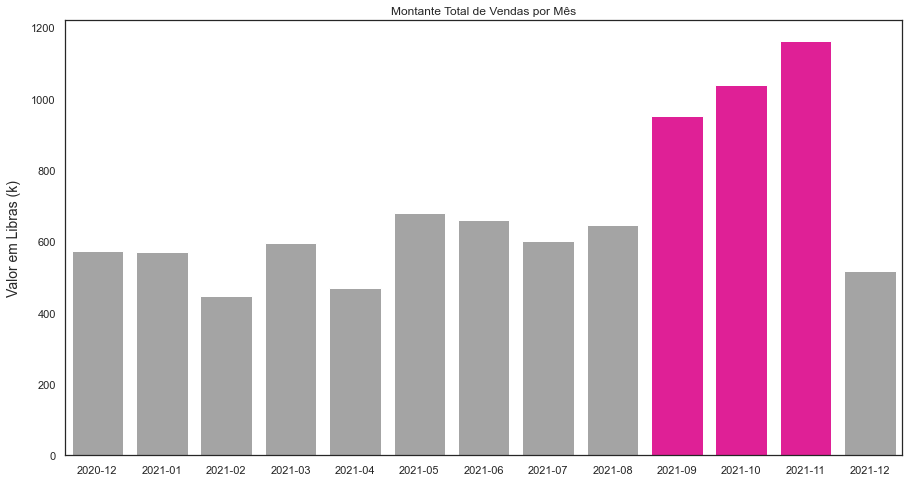

In [29]:
# realizando o cálculo total de vendas por mês
df_montante_mes = pd.DataFrame(df_ecommerce.groupby(['Ano_mes'])
                               ['Valor'].sum()).reset_index()
df_montante_mes.columns = ['Ano_mes', 'Montante Total de Vendas']

# transformando o valor em múltiplo de 1.000 ou K.
df_montante_mes['Montante Total de Vendas (K)'] = (df_montante_mes['Montante Total de Vendas']
                                                   /1000).round(2)

# convertendo tipo do dado da coluna "Ano_mes" para string
df_montante_mes['Ano_mes'] = df_montante_mes['Ano_mes'].astype(str)

# selecionando o valor mínimo dos 3 maiores Montantes totais de vendas
minimo = min(df_montante_mes['Montante Total de Vendas (K)'].nlargest(n=3))

# colorindo de azul os 3 maiores e colorindo de cinza o restante
clrs = [cinza if (x < minimo) else rosa 
        for x in df_montante_mes['Montante Total de Vendas (K)']]

# criando o gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Ano_mes",
                 y="Montante Total de Vendas (K)",
                 data=df_montante_mes,
                 ci=False,
                 palette=clrs)

ax.set_title('Montante Total de Vendas por Mês')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor em Libras (k)', fontsize=14, labelpad=10)

Podemos observar que os meses de _Setembro_, _Outubro_ e _Novembro de 2021_ tiveram o maior montante total, com os valores £952.84K, £1039.32K e £1161.82K, respectivamente.

- Montante de vendas dentro e fora do Reino Unido, por mês

Text(0, 0.5, 'Valor em Libras (k)')

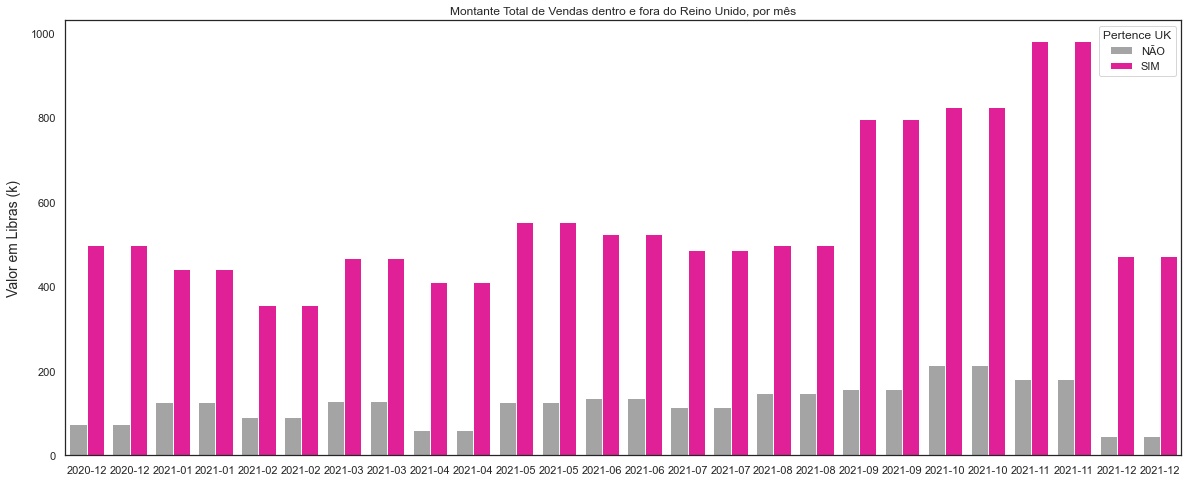

In [30]:
df_mes= pd.DataFrame(df_ecommerce.groupby(by=['Ano_mes',
                                    'Pertence_UK'])['Valor'].sum()).reset_index()
df_mes.columns = ['Ano_mes','Pertence UK', 'Montante Total de Vendas']

# transformando o valor em múltiplo de 1.000 ou K.
df_mes['Montante Total de Vendas (K)'] = (df_mes['Montante Total de Vendas']/1000).round(2)

# convertendo tipo do dado da coluna "Ano_mes" para string para ser utilizando no gráfico que será gerado
df_mes['Ano_mes'] = df_mes['Ano_mes'].astype(str)


sns.set_theme(style="white", palette=[cinza, rosa])
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Ano_mes",
                 y="Montante Total de Vendas (K)",
                 data=df_mes,
                 order=df_mes['Ano_mes'],
                 hue='Pertence UK',
                 ci=False)

ax.set_title('Montante Total de Vendas dentro e fora do Reino Unido, por mês')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor em Libras (k)', fontsize=14, labelpad=10)

Observando o gráfico de barras é possível perceber que a grande diferença nos valores de montantes das vendas para o Reino Unido que são bem maiores do que as vendas para fora do Reino Unido.

- 10 Maiores clientes que fizeram mais compras dentro e fora do Reino Unido, dentro de um mesmo mês

Text(0, 0.5, 'Valor em Libras')

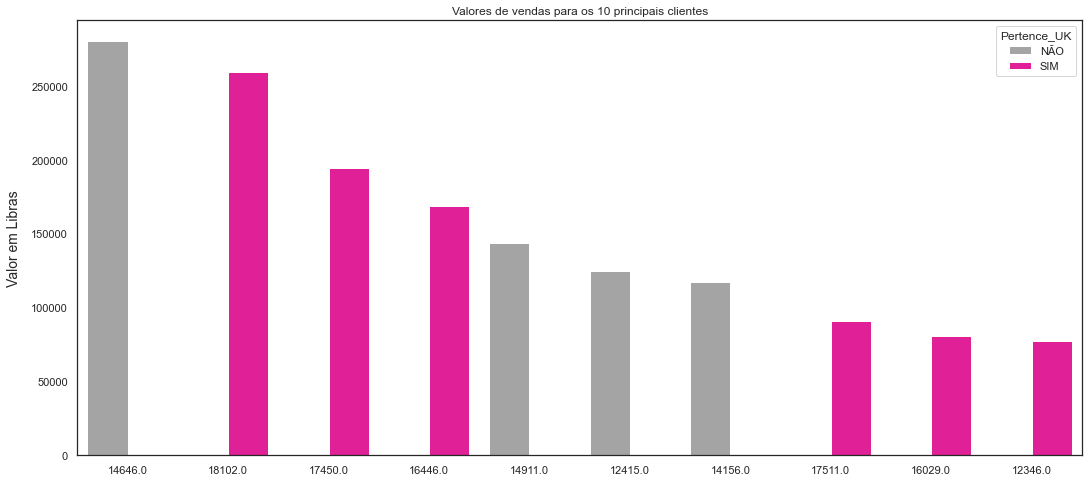

In [31]:
# calculando os 10 maiores clientes e determinando se eles são ou não do Reino Unido
df_cliente_mes= pd.DataFrame(df_ecommerce.groupby(by=['ID_Cliente',
                                                      'Pertence_UK'])
                             ['Valor'].sum()).reset_index()
df_cliente_mes.columns = ['Cliente', 'Pertence_UK', 'Montante Total de Vendas']
df_cliente_mes.sort_values('Montante Total de Vendas', ascending=False, inplace=True)
df_cliente_mes = df_cliente_mes.head(10)

# visualização
sns.set_theme(style="white", palette=[cinza, rosa])
plt.figure(figsize = (18,8))
ax = sns.barplot(x="Cliente",
                 y="Montante Total de Vendas",
                 data=df_cliente_mes,
                 hue='Pertence_UK',
                 order=df_cliente_mes['Cliente'],
                 ci=False)
ax.set_title('Valores de vendas para os 10 principais clientes')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor em Libras', fontsize=14, labelpad=10)

- Quantidade mensal de produtos vendidos

Text(0, 0.5, 'Quantidade')

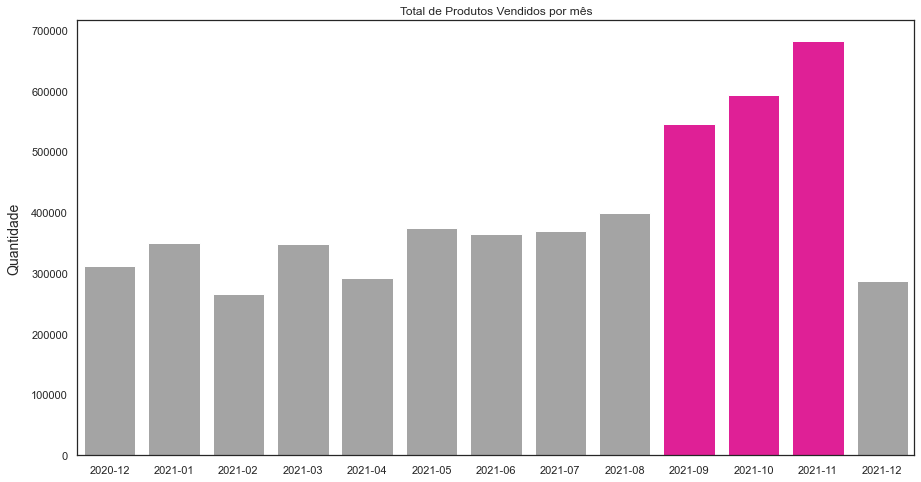

In [32]:
# Calculando a quantidade mensal de produtos vendos
df_produtos = pd.DataFrame(df_ecommerce.groupby(['Ano_mes'])
                           ['Quantidade'].sum()).reset_index()
df_produtos.columns = ['Ano_mes', 'Quantidade de Produtos Vendidos']

# convertendo tipo do dado da coluna "Ano_mes" para string
df_produtos['Ano_mes'] = df_produtos['Ano_mes'].astype(str)

# selecionando o valor mínimo dos 3 maiores Montantes totais de vendas
minimo = min(df_produtos['Quantidade de Produtos Vendidos'].nlargest(n=3))

# colorindo de azul os 3 maiores e colorindo de cinza o restante
clrs = [cinza if (x < minimo) else rosa 
        for x in df_produtos['Quantidade de Produtos Vendidos']]

# criando o gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Ano_mes",
                 y="Quantidade de Produtos Vendidos",
                 data=df_produtos,
                 ci=False,
                 palette=clrs)

ax.set_title('Total de Produtos Vendidos por mês')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=10)

- Ticket Médio do Período

In [33]:
ticket = (df_ecommerce['Valor'].sum() / 
          df_ecommerce['ID_Cliente'].count()).round(2)
ticket

479.99

O Ticket Médio é de **£479.99**.

- Ticket Médio Mensal

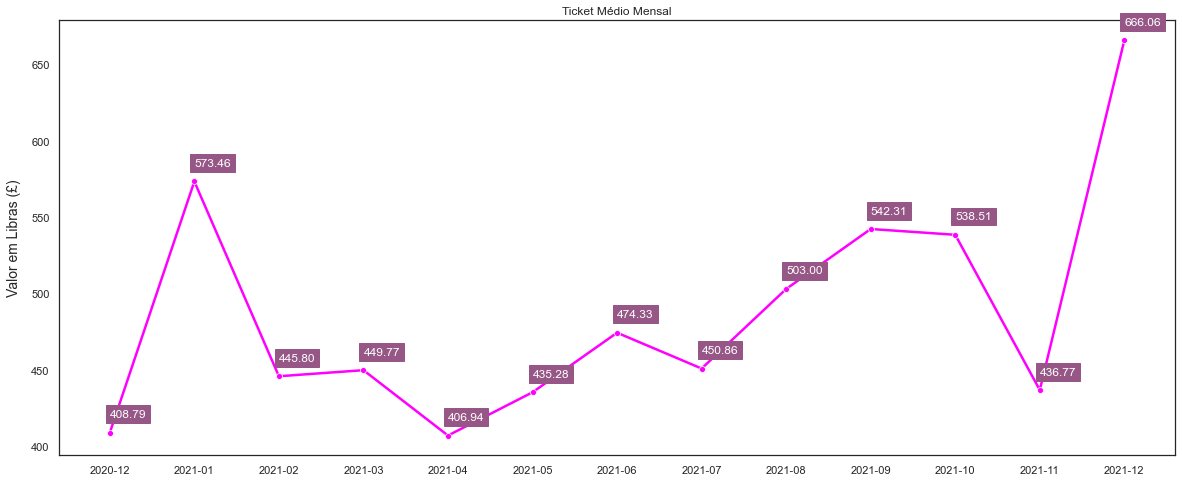

In [34]:
# Calculando o valor das vendas mensal
ticket = pd.DataFrame(df_ecommerce.groupby(by=['Ano_mes'])
                      ['Valor'].sum()).reset_index()

# Calculando a quantidade de clientes mensais
ticket2 = pd.DataFrame(df_ecommerce.groupby(by=['Ano_mes'])
                       ['ID_Cliente'].count()).reset_index()

# Unindo os dois dataframes criados 
ticket_mensal =  pd.merge(ticket,
                          ticket2, on="Ano_mes")

# Calculando o valor do ticket médio mensal
for i in range(12):
    ticket_mensal['Ticket Médio Mensal'] = (ticket['Valor'] 
                                            / ticket2['ID_Cliente']).round(2)

# convertendo tipo do dado da coluna "Ano_mes" para string
ticket_mensal['Ano_mes'] = ticket_mensal['Ano_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))

ax = sns.lineplot(data=ticket_mensal,
                  x="Ano_mes",
                  y="Ticket Médio Mensal",
                  color="magenta",
                  linewidth=2.5,
                  marker="o")

ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor em Libras (£)', fontsize=14, labelpad=10)
ax.set_title('Ticket Médio Mensal')

# incluindo rótulos nos pontos do gráfico
for x, y in zip(ticket_mensal['Ano_mes'],
                ticket_mensal['Ticket Médio Mensal']):
     plt.text(x = x, # posição x
               y = y+10, # posição y + 30 na coordenada
               s = '{:.2f}'.format(y), # formato 
               color = 'white').set_backgroundcolor('#965786') # cor da fonte e do background

<a id='analise-coorte'></a>
# <font color="#ff009e"> 4. Análise de Coorte </font>
<hr color="#F5F5F5" size="1">

Agora, iremos construir uma função que calcula o coorte e retorna o dataframe gerado.

## O que é Análise de Coorte?

Em Estatística, coorte é um **conjunto de pessoas** que têm em comum um **evento que se deu no mesmo período**.

A análise do comportamento e o desempenho de grupos de clientes que possuam atributos em comum auxilia nas estratégias que deverão ser adotadas. Por exemplo, todos os clientes com a mesma data de aquisição pertencem ao mesmo coorte. 

Para este estudo iremos organizar **os clientes em grupos de data de aquisição** e iremos analisar o comportamento desses grupos de acordo com métricas como **retenção de clientes**, exclusivamente.

<AxesSubplot:title={'center':'Análise de Coorte para avaliação de retenção de clientes'}, xlabel='Periodo', ylabel='Coorte'>

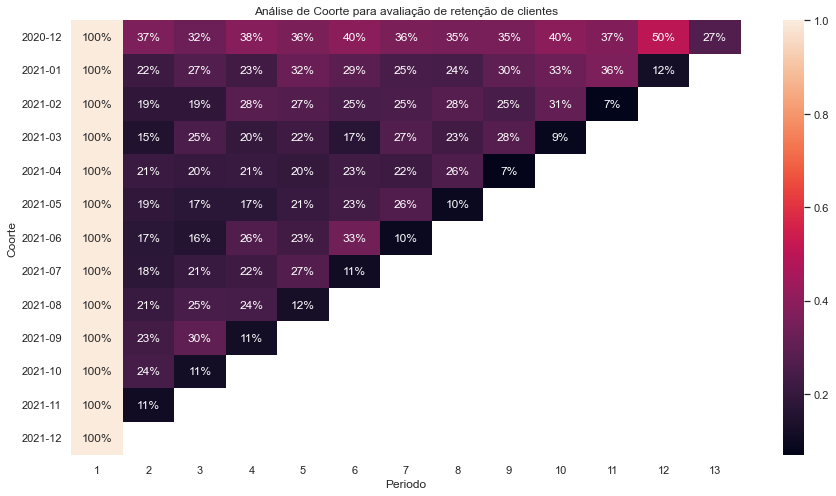

In [35]:
# Definindo uma função para atribuuir os períodos existentes
def coorte_periodo(df_coorte):
    df_coorte['Periodo'] = np.arange(len(df_coorte)) + 1
    return df_coorte

def criando_coorte(df_coorte):
    # usando os ID's dos clientes como índice
    df_coorte.set_index('ID_Cliente', inplace=True)

    # criando o coorte de cada cliente
    df_coorte["Coorte"] = df_coorte.groupby(level=0)['Ano_mes'].min()

    # resetando os índices
    df_coorte.reset_index(inplace=True)

    # Agrupando por Coorte e Ano_Mes das faturas
    coorte = df_coorte.groupby(['Coorte', 'Ano_mes'])
    cohorts = coorte.agg({'ID_Cliente': pd.Series.nunique,
                          'N°_da_fatura' : pd.Series.nunique,
                          'Valor': np.sum})
    cohorts.rename(columns={'ID_Cliente':'Total_clientes',
                            'N°_da_fatura':'Total_faturas'}, inplace=True)

    cohorts = cohorts.groupby(level=0).apply(coorte_periodo)

    # reindexando o dataframe
    cohorts.reset_index(inplace=True)
    cohorts.set_index(['Coorte', 'Periodo'], inplace=True)

    # criando uma série para salvar o total de cada cliente por coorte
    coorte_grupo = cohorts['Total_clientes'].groupby(level=0).first()

    # calculando o total de retenção dos clientes por cada grupo de coorte
    retencao_clientes = cohorts['Total_clientes'].unstack(0).divide(coorte_grupo, axis=1)
    return retencao_clientes

# calculando a retenção dos clientes com a função criando_coorte
retencao_clientes = criando_coorte(df_ecommerce)

#Aplicando o gráfico no dataframe gerado para visualizar a retenção
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(15,8))
plt.title('Análise de Coorte para avaliação de retenção de clientes')
sns.heatmap(retencao_clientes.T,
            mask=retencao_clientes.T.isnull(),
            annot=True,
            fmt='.0%')

<AxesSubplot:title={'center':'Análise de Coorte para avaliação de retenção de clientes que são do Reino Unido'}, xlabel='Periodo', ylabel='Coorte'>

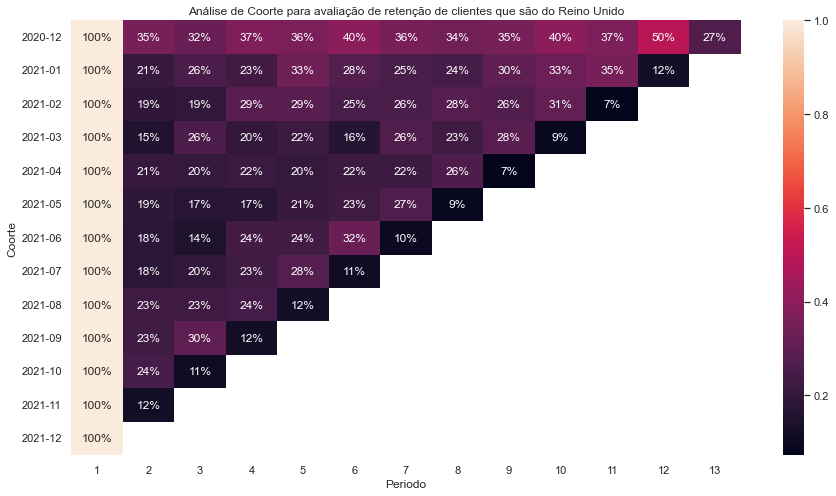

In [36]:
# copiando os dados das faturas pertencentes ao Reino Unido
df_coorte_UK = df_ecommerce[df_ecommerce['Pertence_UK']=='SIM'].copy()

# calculando a retenção dos clientes com a função criando_coorte
retencao_clientes_UK = criando_coorte(df_coorte_UK)

#Aplicando o gráfico no dataframe gerado para visualizar a retenção
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(15,8))
plt.title('Análise de Coorte para avaliação de retenção de clientes que são do Reino Unido')
sns.heatmap(retencao_clientes_UK.T,
            mask=retencao_clientes_UK.T.isnull(),
            annot=True,
            fmt='.0%')

<AxesSubplot:title={'center':'Análise de Coorte para avaliação de retenção de clientes que não são do Reino Unido'}, xlabel='Periodo', ylabel='Coorte'>

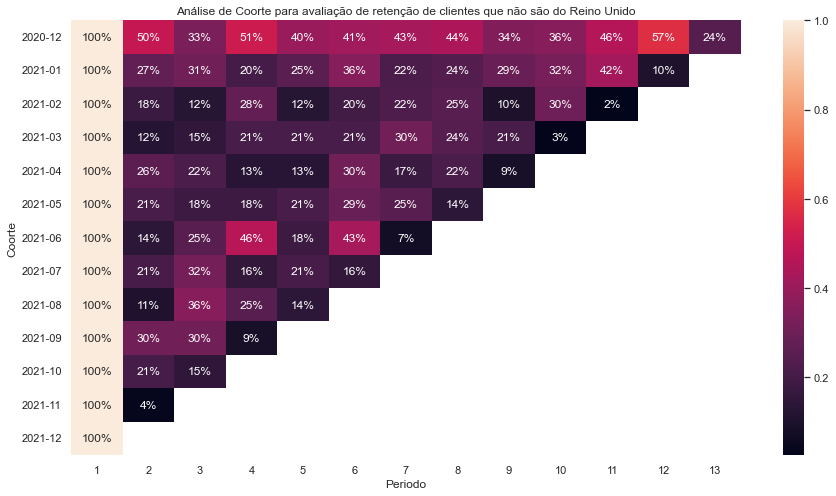

In [37]:
# copiando os dados das faturas que não pertencem ao Reino Unido
df_coorte_nao_UK = df_ecommerce[df_ecommerce['Pertence_UK']=='NÃO'].copy()

# calculando a retenção dos clientes com a função criando_coorte
retencao_clientes_nao_UK = criando_coorte(df_coorte_nao_UK)

#Aplicando o gráfico no dataframe gerado para visualizar a retenção
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(15,8))
plt.title('Análise de Coorte para avaliação de retenção de clientes que não são do Reino Unido')
sns.heatmap(retencao_clientes_nao_UK.T,
            mask=retencao_clientes_nao_UK.T.isnull(),
            annot=True,
            fmt='.0%')

<a id='segmentacao'></a>
# <font color="#ff009e"> 5 - Segmentação de Clientes usando RFM </font>
<hr color="#F5F5F5" size="1">

A análise de RFM (Recência, Frequência e Valor Monetário) é baseada no **Princípio de Pareto** e é utilizado no  diz que 80% dos resultados vêm de 20% das causas. Da mesma forma, 20% dos clientes contribuem com 80% da sua receita total.

O RFM pode ser representado assim:

- **Recência:** quais são os clientes realizaram compras mais recentemente?;
- **Frequência:** quais são os clientes que mais comparar mais?; e
- **Valor monetário:** quais clientes realizaram as maiores compradas somadas ao total?

Após categorizar e classificar cada cliente pelos resultados de encontrados é possível **determinar qual tipo de segmento que cada cliente** será definido, e após isso, **quais estratégia será aplicada para cada cliente**. 

A partir de agora iremos preparar e calcular o RFM dos clientes.


<a id='preparando-segmentacao'></a>
## <font color="#ff009e"> 5.1 Preparar um novo conjunto de dados para gerar segmentação dos clientes </font>
<hr color="#F5F5F5" size="1">


<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Como obter:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → <strong>Recência:</strong>  calculamos quantos dias foram desde a compra mais recente do cliente;</div>
    <div style="color: rgb(0, 0, 0);"> → <strong>Frequência:</strong> calculamos quantas compras o cliente já realizou; e</div>
    <div style="color: rgb(0, 0, 0);"> → <strong>Monetário:</strong> calculamos a soma de todas as compras realizadas pelo cliente.</div>
</div>

In [38]:
# Calculando a recencia
df_recencia = df_ecommerce.groupby(by='ID_Cliente',
                                   as_index=False)['Data_da_fatura'].max()
df_recencia.columns = ['Cliente', 'Data_ultima_compra']

data_recencia = df_recencia['Data_ultima_compra'].max()
df_recencia['Recencia'] = df_recencia['Data_ultima_compra'].apply(lambda x:
                                                                  (data_recencia - x).days)

# calculando a frequencia
df_frequencia = df_ecommerce.drop_duplicates().groupby(
                    by=['ID_Cliente'],as_index=False)['Data_da_fatura'].count()
df_frequencia.columns = ['Cliente', 'Frequencia']

# calculando o monetário
df_monetario = df_ecommerce.groupby(by='ID_Cliente',
                                    as_index=False)['Valor'].sum()
df_monetario.columns = ['Cliente', 'Monetario']

# criando dataframe com os dados calculados já unidos
df_rfm = df_recencia.merge(df_frequencia, on='Cliente')
df_rfm = df_rfm.merge(df_monetario, on='Cliente')

df_ecommerce_segmentacao = df_ecommerce.copy()
df_ecommerce_segmentacao.drop(columns=['N°_da_fatura',
                                       'Data_da_fatura',
                                       'Quantidade',
                                       'Valor',
                                       'Ano_mes'],
                                inplace=True)

# removendo duplicados
df_ecommerce_segmentacao.drop_duplicates(inplace=True)
df_ecommerce_segmentacao.rename(columns={'ID_Cliente':'Cliente'}, inplace=True)

# unindo os DataFrames pelo ID do Cliente
df_rfm = df_ecommerce_segmentacao.merge(df_rfm, on='Cliente')
df_rfm.head()

,Cliente,País,Pertence_UK,Coorte,Data_ultima_compra,Recencia,Frequencia,Monetario
0,17850.0,United Kingdom,SIM,2020-12,2020-12-02 15:27:00,371,34,5391.21
1,13047.0,United Kingdom,SIM,2020-12,2021-11-08 12:06:00,31,10,3237.54
2,12583.0,France,NÃO,2020-12,2021-12-07 08:07:00,2,15,7281.38
3,13748.0,United Kingdom,SIM,2020-12,2021-09-05 09:45:00,95,5,948.25
4,15100.0,United Kingdom,SIM,2020-12,2021-01-10 10:35:00,333,3,876.00


<a id='criar-quartis'></a>
## <font color="#ff009e"> 5.2 - Criando o quartil para realizar a classificação do cliente </font>
<hr color="#F5F5F5" size="1">

Para gerar os quartis necessários iremos analisar como é a distribuição dos dados de Recência, Frequência e Valor Monetário.

In [39]:
# gerando Média, Mediana e Moda da Recencia
print('Recencia')
print('Média: ' ,df_rfm['Recencia'].mean())
print('Mediana: ' ,df_rfm['Recencia'].median())
print('Moda: ', df_rfm['Recencia'].mode())

# gerando Média, Mediana e Moda da Recencia
print('Frequência')
print('Média: ' ,df_rfm['Frequencia'].mean())
print('Mediana: ' ,df_rfm['Frequencia'].median())
print('Moda: ', df_rfm['Frequencia'].mode())

# gerando Média, Mediana e Moda do Monetário
print('Monetário')
print('Média: ' ,df_rfm['Monetario'].mean())
print('Mediana: ' ,df_rfm['Monetario'].median())
print('Moda: ', df_rfm['Monetario'].mode())

Recencia
Média:  91.43961352657004
Mediana:  50.0
Moda:  0    3
dtype: int64
Frequência
Média:  4.2824936737980215
Mediana:  2.0
Moda:  0    1
dtype: int64
Monetário
Média:  2055.612300437087
Mediana:  675.27
Moda:  0    76.32
dtype: float64


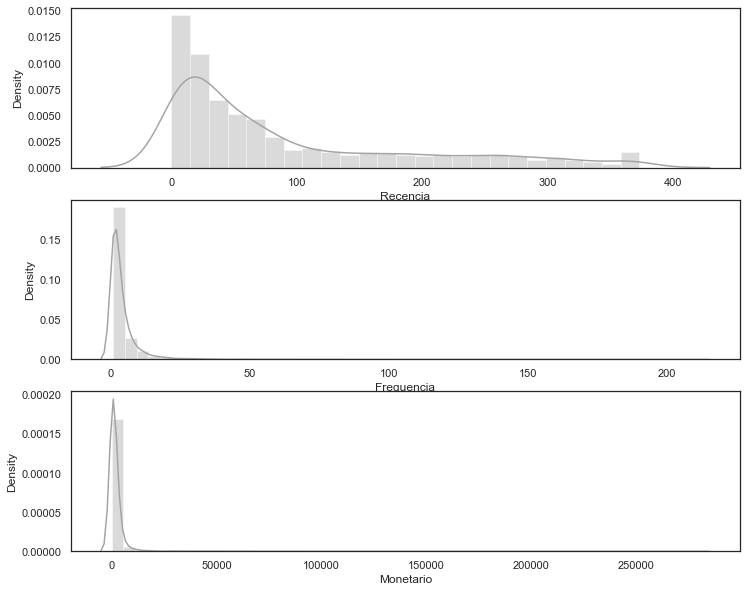

In [40]:
# Plot das distribuições de RFM
plt.figure(figsize=(12,10))

# Distribuição da Recência
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recencia'])

# Distribuição da Frequência
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequencia'])

# Distribuição do Monetário
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetario'])

plt.show()

Podemos perceber que eles podem ser classificados como uma distribuição normal assimétrica a direita.

In [41]:
df_rfm.describe()

,Cliente,Recencia,Frequencia,Monetario
count,4347.000000,4347.000000,4347.000000,4347.000000
mean,15294.640212,91.439614,4.282494,2055.612300
std,1724.722441,99.942744,7.722808,8980.352817
min,12346.000000,0.000000,1.000000,0.000000
25%,13806.500000,17.000000,1.000000,307.470000
50%,15292.000000,50.000000,2.000000,675.270000
75%,16776.500000,141.000000,5.000000,1671.330000
max,18287.000000,373.000000,211.000000,280206.020000


<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">💭  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → Para facilitar a nossa criação dos quartis necessários para realizarmos a segmentação, iremos identificar as faturas que tiveram valor total igual a £0,00 e classificar que elas tiveram Frequência igual a 0 também. </div>
</div>

In [42]:
# deixando frequencia igual 0 quando monetário for igual a 0.
for i in df_rfm.index:
    if df_rfm['Monetario'][i] == 0:
        df_rfm['Frequencia'][i] = 0

C:\Users\carla\AppData\Local\Temp/ipykernel_43004/4151678475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Frequencia'][i] = 0


In [43]:
df_rfm.describe()

,Cliente,Recencia,Frequencia,Monetario
count,4347.000000,4347.000000,4347.000000,4347.000000
mean,15294.640212,91.439614,4.282264,2055.612300
std,1724.722441,99.942744,7.722921,8980.352817
min,12346.000000,0.000000,0.000000,0.000000
25%,13806.500000,17.000000,1.000000,307.470000
50%,15292.000000,50.000000,2.000000,675.270000
75%,16776.500000,141.000000,5.000000,1671.330000
max,18287.000000,373.000000,211.000000,280206.020000


Assim, agora temos os quartis definidos:

| Categoria | Recência | Frequência | Monetário |
| --- | --- | --- | --- |
| **Min** | 0 | 0 | £0,00 |
| **25%** | 17 | 1 | £307,47 |
| **50%** | 50 | 2 | £675,27 |
| **75%** | 141 | 5 | £1671,33 |
| **Máx** | 373 | 211 | £280.206,02 |

Com eles definidos, agora iremos criá-los no dataset.

In [44]:
# Criando os quartis para Recência, Frequência e Monetário
df_rfm['r_quartil'] = pd.qcut(df_rfm['Recencia'], 4, ['1','2','3','4'])
df_rfm['f_quartil'] = pd.qcut(df_rfm['Frequencia'], 4, ['1','2','3','4'])
df_rfm['m_quartil'] = pd.qcut(df_rfm['Monetario'], 4, ['1','2','3','4'])

# Criando coluna "RFM" com a junção dos valores de Recência, Frequência e Monetário
df_rfm['RFM'] = df_rfm.r_quartil.astype(str) + df_rfm.f_quartil.astype(str) + df_rfm.m_quartil.astype(str)
df_rfm.head()

,Cliente,País,Pertence_UK,Coorte,Data_ultima_compra,Recencia,Frequencia,Monetario,r_quartil,f_quartil,m_quartil,RFM
0,17850.0,United Kingdom,SIM,2020-12,2020-12-02 15:27:00,371,34,5391.21,4,4,4,444
1,13047.0,United Kingdom,SIM,2020-12,2021-11-08 12:06:00,31,10,3237.54,2,4,4,244
2,12583.0,France,NÃO,2020-12,2021-12-07 08:07:00,2,15,7281.38,1,4,4,144
3,13748.0,United Kingdom,SIM,2020-12,2021-09-05 09:45:00,95,5,948.25,3,3,3,333
4,15100.0,United Kingdom,SIM,2020-12,2021-01-10 10:35:00,333,3,876.00,4,3,3,433


<a id='categorizando-dataset'></a>
## <font color="#ff009e"> 5.3 Categorizando cada segmento de cliente de acordo com RFM gerado </font>
<hr color="#F5F5F5" size="1">

De acordo com o **[artigo da Puttler](https://www.putler.com/rfm-analysis/)** podemos utilizar as 11 seguintes descrições para cada categoria de clientes. Baseado nisso, já inclui a coluna "RFM" contendo os valores que utilizarei para identificar cada tipo:

| Categoria | Descrição | RFM |
| --- |--- |--- |
| **Campeões** | compraram recentemente, compram com frequência e gastam mais | 144 |
| **Clientes fiéis** | gastam bem e com boa frequência. São responsivos a promoções | 134, 143, 133 |
| **Fiéis em potencial** | clientes recentes, mas que gastaram um bom dinheiro e já compraram mais de uma vez | 123 e 124 |
| **Novos clientes** | compraram recentemente, mas não com frequência | 111, 112, 113 e 114 |
| **Promessas** | compradores recentes, mas que não gastaram muito | 121, 122, 212 e 222 |
| **Clientes precisando de atenção** | recência, frequência e valor monetário acima da curva, mas podem não ter comprado tão recentemente assim | 244 e 344 |
| **Quase dormentes** | recência, frequência e valor monetário abaixo da média. Tendem a se perder se não forem reativados | 232, 322, 323 e 332 |
| **Em risco** | gastaram bastante dinheiro e compraram com frequência, mas já há bastante tempo. Precisam retornar à base de clientes | 333, 334, 343 e 433 |
| **Não pode perder** | fizeram compras grandes e frequentes, mas não voltaram por muito tempo | 243, 344, 434, 443 e 444 |
| **Hibernando** | a última compra foi há muito tempo. Gastam pouco e fazem poucos pedidos | 311, 312, 321, 412, 421 e 422 |
| **Perdidos** | a menor recência, frequência e valor monetário entre todos | 411 |

In [45]:
# Criando dicionário para facilitar a categorização no Dataframe
categorias_dict = {'144':'Campeões',
              '133':'Clientes Fiéis',
              '134':'Clientes Fiéis',
              '143':'Clientes Fiéis',
              '234':'Clientes Fiéis',
              '243':'Clientes Fiéis',
              '244':'Clientes Fiéis',
              '123':'Fiéis em Potencial',
              '213':'Fiéis em Potencial',
              '214':'Fiéis em Potencial',
              '223':'Fiéis em Potencial', 
              '224':'Fiéis em Potencial', 
              '233':'Fiéis em Potencial',             
              '111':'Novos Clientes',
              '112':'Novos Clientes', 
              '113':'Novos Clientes',
              '114':'Novos Clientes',              
              '124':'Novos Clientes',             
              '121':'Promessas',
              '211':'Promessas',
              '122':'Promessas',
              '212':'Promessas',
              '221':'Promessas', 
              '222':'Promessas',              
              '131':'Promessas',
              '132':'Promessas',
              '141':'Promessas',
              '142':'Promessas',
              '231':'Promessas',              
              '334':'Clientes Precisando de Atenção', 
              '333':'Clientes Precisando de Atenção',           
              '344':'Clientes Precisando de Atenção',
              '423':'Clientes Precisando de Atenção',
              '432':'Quase Dormentes',
              '232':'Quase Dormentes',
              '313':'Quase Dormentes',
              '314':'Quase Dormentes',
              '331':'Quase Dormentes',
              '332':'Quase Dormentes',
              '322':'Quase Dormentes',
              '323':'Quase Dormentes',
              '342':'Quase Dormentes',
              '343':'Quase Dormentes',              
              '333':'Em Risco',
              '334':'Em Risco',
              '343':'Em Risco',
              '433':'Em Risco', 
              '243':'Não Pode Perder',
              '324':'Não Pode Perder',
              '344':'Não Pode Perder',
              '443':'Não Pode Perder',
              '434':'Não Pode Perder',
              '444':'Não Pode Perder',             
              '311':'Hibernando',
              '312':'Hibernando',             
              '321':'Hibernando',              
              '413':'Hibernando',
              '414':'Hibernando',
              '412':'Hibernando',
              '421':'Hibernando',
              '422':'Hibernando',
              '424':'Hibernando',
              '431':'Hibernando',
              '441':'Hibernando',
              '442':'Hibernando',
              '411':'Perdidos'              
}   

# Criando coluna "Categoria" que irá salvar a classificação
df_rfm['Categoria'] = ''

# atribuindo a classificação para o cliente
for i in df_rfm.index:
    if df_rfm['RFM'][i] in categorias_dict:
        item = df_rfm['RFM'][i]
        df_rfm['Categoria'][i] = categorias_dict[item]

C:\Users\carla\AppData\Local\Temp/ipykernel_43004/4195478081.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Categoria'][i] = categorias_dict[item]


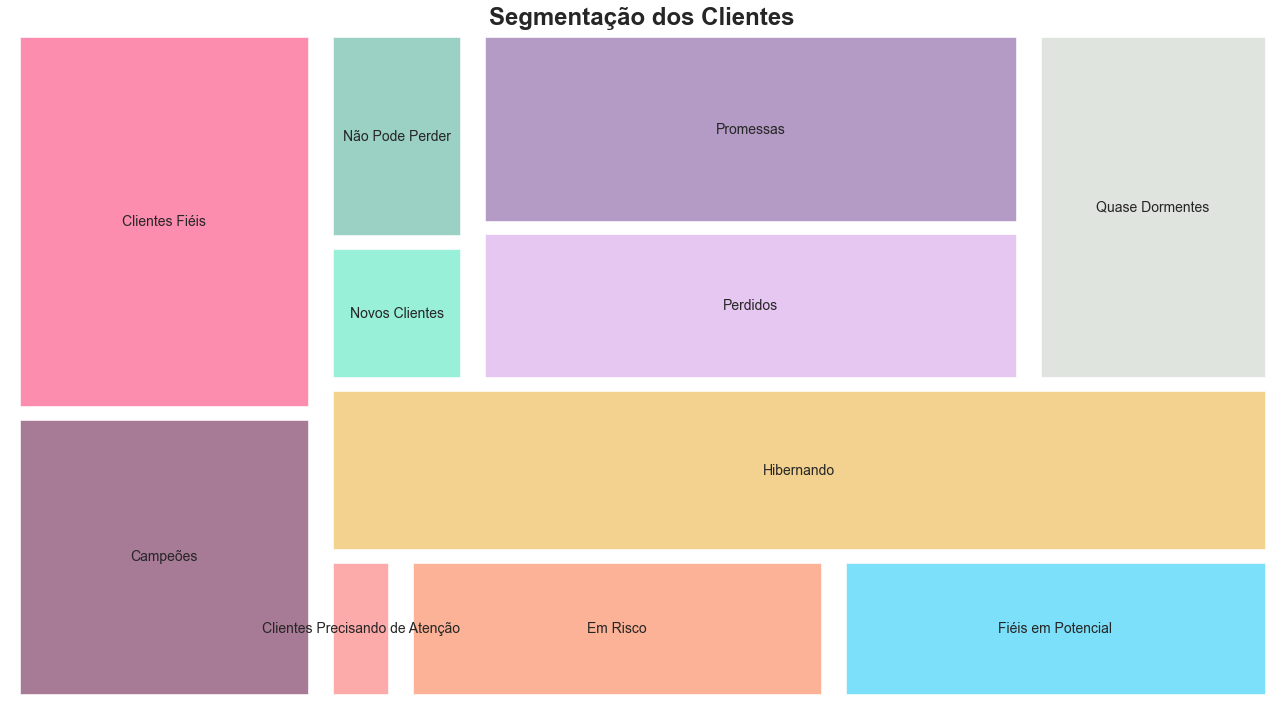

In [46]:
# calculando a quantidade de clientes em cada categoria
df_categorias = df_rfm.groupby(['Categoria'], as_index=False)['RFM'].count()
df_categorias.rename(columns={'RFM':'Quantidade'}, inplace=True)

# definindo uma paleta de cores
colors = [
'#6D214F', #mangenta purple
'#FC427B', #sasquatch socks
'#FD7272', #georgia peach
'#F97F51', #rich gardenia
'#25CCF7', #spiro disco ball
'#EAB543', #honey glow
'#55E6C1', #sweet garden
'#58B19F', #keppel
'#D6A2E8', #bright ubbe
'#82589F', #highlighter lavender
'#CAD3C8', #falling star
'#BDC581', #pine glade
'#F8EFBA', #sarawak white pepper
]

# criando gráfico de segmentacao
fig, ax = plt.subplots(figsize=(18,10))
squarify.plot(sizes=df_categorias['Quantidade'],
              label=df_categorias['Categoria'],
              color=colors,
              pad=True,
              alpha=0.6,
              text_kwargs={'fontsize': 14})

# Adicionando um título
plt.title('Segmentação dos Clientes',
          fontsize=24,
          fontweight="bold")

# Removendo os eixos
plt.axis('off')

# Ajustando o gráfico
plt.tight_layout()

plt.show()

## Segmentação de Clientes por Categorias

Text(0, 0.5, 'Quantidade')

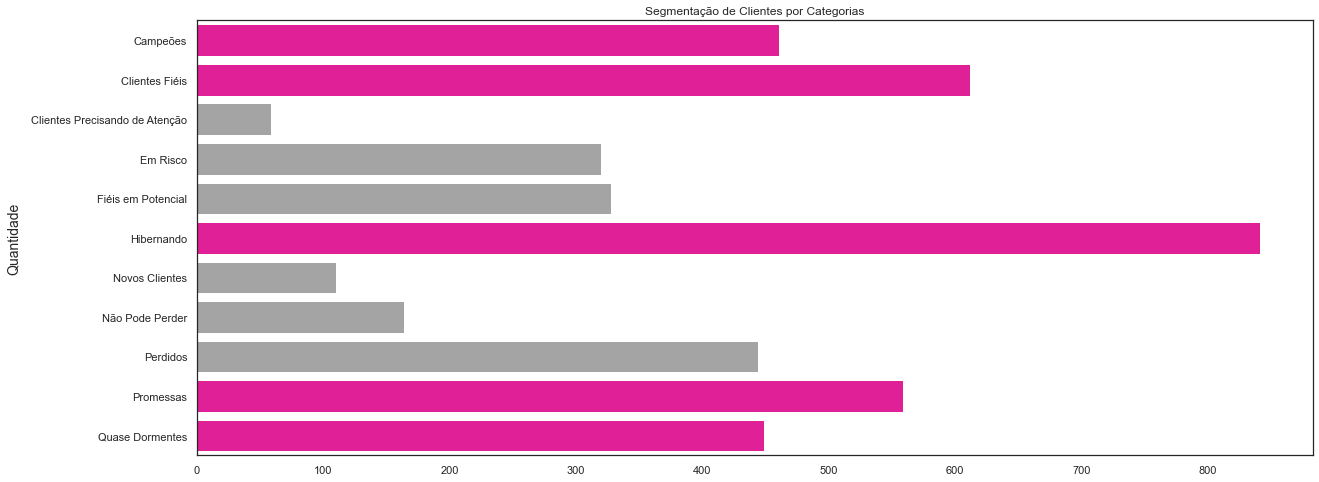

In [47]:
# selecionando o valor mínimo dos 3 maiores Montantes totais de vendas
minimo = min(df_categorias['Quantidade'].nlargest(n=5))

# colorindo de azul os 3 maiores e colorindo de cinza o restante
clrs = [cinza if (x < minimo) else rosa for x in df_categorias['Quantidade']]

# criando o gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))
ax = sns.barplot(y="Categoria",
                 x="Quantidade",
                 data=df_categorias,
                 ci=False,
                 palette=clrs)

ax.set_title('Segmentação de Clientes por Categorias')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=10)

Os cinco maiores segmentos são: **Hibernando**, **Clientes Fiéis**, **Promessas**, **Campeões** e **Quase Dormentes**.

In [48]:
clientes = df_rfm.groupby(['Categoria','Pertence_UK'],
                                   as_index=False)['Cliente'].count()
clientes.rename(columns={'Pertence_UK':'Pertence ao Reino Unido?','Cliente':'Quantidade'}, inplace=True)
clientes.sort_values(by='Categoria', ascending=False, inplace=True)

fig = px.bar(clientes,
             x="Quantidade",
             y="Categoria",
             color="Pertence ao Reino Unido?",
             title="Segmentação dos clientes da UK Merch divididos em se pertence ou não ao Reino Unido",
             orientation='h',
            color_discrete_sequence=[
                  px.colors.qualitative.Light24[16],
                  px.colors.qualitative.Light24[13]])
fig.show()

In [49]:
montante = df_rfm.groupby(['Categoria'],as_index=False)['Monetario'].sum()
montante.rename(columns={'Monetario':'Total de Vendas'}, inplace=True)
montante.sort_values(by='Total de Vendas', ascending=True, inplace=True)

fig = px.bar(montante,
             x="Total de Vendas",
             y="Categoria",
             title="Total de Vendas por Categoria",
             orientation='h',
            color_discrete_sequence=[
                  px.colors.qualitative.Light24[16]])
fig.show()

In [50]:
print('Total de Vendas: ', montante['Total de Vendas'].sum())

Total de Vendas:  8935746.67


In [51]:
clientes_campeoes = montante['Total de Vendas'][0]
print("O faturamento da categoria Campeão: ",clientes_campeoes)
print("O faturamento das outras categorias: ",montante['Total de Vendas'].sum()-clientes_campeoes)
print("Percentual: ",clientes_campeoes/montante['Total de Vendas'].sum())

O faturamento da categoria Campeão:  4369518.38
O faturamento das outras categorias:  4566228.29
Percentual:  0.488993090490109


In [52]:
clientes_fieis = montante['Total de Vendas'][1]
print("O faturamento da categoria Clientes Fiéis: ",clientes_fieis)
print("Percentual: ",clientes_fieis/(montante['Total de Vendas'].sum()))

O faturamento da categoria Clientes Fiéis:  1876815.57
Percentual:  0.21003455439275565


<a id='recomendacoes'></a>
# <font color="#ff009e"> Recomendações a UK Merch </font>
<hr color="#F5F5F5" size="1">

* Considerando o Princípio de Pareto que diz que precisamos concentrar nossos esforços em <font color="#ff009e"><strong>20% das atividades que geram 80% de retorno</strong></font>, então devemos avaliar quais segmentos dos clientes que causam mais retorno a UK Merch.
* A categoria **Campeões gerou £4.369.518,38** e isso representa **48,90% do faturamento total** que é de £8.935.746,67. 
* Apenas **461 clientes** estão classificados como Campeões, representando em torno de **10,60% da quantidade total de clientes**.
* A segunda maior categoria em faturamento é **Clientes Fiéis** e **gerou £1.876.815,57**, o que dá **21% do faturamento**. Ela possui **612 clientes** ou **14,08%** dos clientes totais.

<div class="alert alert-success"> 
<strong><div style="color: rgb(0, 0, 0);">💡 O que fazer?</div></strong> <br>
     <div style="color: rgb(0, 0, 0);">  → Podemos concluir que <strong>principais esforços devam ser concentrados</strong> nos clientes classificados como <strong>Campeões</strong>, pois apenas <mark><strong>10,60% dos clientes</strong></mark> foi responsável por <strong><mark>gerar quase 50% do faturamento</mark></strong>.</div>         
     <div style="color: rgb(0, 0, 0);">  → Os esforços empregados na segunda maior categoria precisam ser bem avaliados, pois o seu faturamento é baixo se comparado ao faturamento da categoria Campeões.</div>
    <div style="color: rgb(0, 0, 0);">  → Também podemos reforçar que a análise de <strong>retenção de clientes por coorte</strong> possui melhor desempenho para clientes que <strong>moram no Reino Unido e indico que esses clientes sejam priorizados</strong>.</div>
</div>

## <font color="#ff009e"> Recomendações adicionais para cada categoria de cliente </font>
<hr color="#F5F5F5" size="1">

As recomendações de ações indicadas pela [Putler](https://www.putler.com/rfm-analysis/) a serem adotadas para cada categoria de clientes podem ser resumidas principalmente em:

| Categoria | Recomendação | 
|--- |--- |
| **Campeões** | Recompense-os. Os campeões podem ser _early adopters_ de novos produtos e promoverão a marca. |
| **Clientes fiéis** | Ofereça produtos de maior valor. Peça por reviews nos produtos e faça o possível para engajá-los. | 
| **Fiéis em potencial** | Ofereça programas de membros ou de lealdade, além de recomendar outros produtos. |
| **Novos clientes** | Dê todo o suporte que precisam no onboarding, de modo que o sucesso seja atingido mais rapidamente. Comece a construir um relacionamento. |
| **Promessas** | Crie _awareness_ para a sua marca e ofereça testes ou avaliações gratuitas. |
| **Clientes precisando de atenção** | Ofereça ofertas por tempo limitado, recomendadas de acordo com compras anteriores. Assim, eles podem ser reativados. |
| **Quase dormentes** | Compartilhe recursos valiosos, recomende produtos ou renovações populares com desconto e reconecte-se com eles. |
| **Em risco** | Envie e-mails personalizados para se reconectar com eles. Ofereça renovações e proporcione recursos úteis. |
| **Não pode perder** | Conquiste-os novamente por meio de renovações ou de novos produtos. Converse com eles para evitar que reforcem a concorrência. |
| **Hibernando** | Ofereça outros produtos relevantes e descontos especiais. Assim, torna-se possível recriar o valor da marca para tais clientes. |
| **Perdidos** | Tente reviver seu interesse com campanhas. Se não funcionar, ignore. |

<a id='referencias'></a>
# <font color="#ff009e"> Referências importantes para o desenvolvimento deste projeto </font>
<hr color="#F5F5F5" size="1">

[Como fazer Análise Cohort e por que ela é importante para PMs](https://www.cursospm3.com.br/blog/como-fazer-analise-cohort-e-por-que-ela-e-importante-para-pms/)

[Como fazer: Análise Cohort com Google Colab, Pandas e Seaborn em 5 passos](https://dataholds.com/como-fazer-analise-cohort-com-google-colab-pandas-e-seaborn-em-5-passos/)

[RFM Analysis For Sucessful Customer Segmentation](https://www.putler.com/rfm-analysis/)

[A análise RFM para segmentação de clientes](https://vidadeproduto.com.br/analise-rfm/)

[Introduction to Customer Segmentation in Python](https://www.datacamp.com/tutorial/introduction-customer-segmentation-python)